## What is Airbnb and how does it work?
#### A community built on sharing
Airbnb began in 2008 when two designers who had space to share hosted three travelers looking for a place to stay. Now, millions of hosts and travelers choose to create a free Airbnb account so they can list their space and book unique accommodations anywhere in the world. And Airbnb experience hosts share their passions and interests with both travelers and locals.

## Importing the python module

Project Reference Link: https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb

## Data Source 
   - Used the NYC Airbnb Open Data from Kaggle:https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
   - Abstract overview of the notebook
   - This dataset has around 49,000 observations within 16 columns and values of this dataset is mixed with categorical    and numeric 
   

### 1. Importing necessery libraries for future analysis of the dataset

In [2]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)
import os

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

'''Spatial Visualizations'''
import folium
import folium.plugins

'''NLP - WordCloud'''
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

### 2. Acquring and Load Data
   - Read the nyc airbnb dataset as dataframe 
   - Presenting the code and methods for acquring the data. Loading the data into proper format for analysis.

In [3]:
df=pd.read_csv('AB_NYC_2019.csv')
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  10/19/2018   
1  Entire home/apt    225               1                 45   5/21/2019   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270    7/5/2019   
4  Entire home/apt     80              10                  9  11/19/2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### 3. Exploratory Data Analysis (EDA)

#### 3.1 Checking amount of rows and columns in given dataset to overview the size we are working with 

In [4]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])

Rows     : 48895
Columns  : 16


#### 3.2 Checking for missing values and present in bar chart 

In [5]:
# Checking for missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Text(0, 0.5, '%')

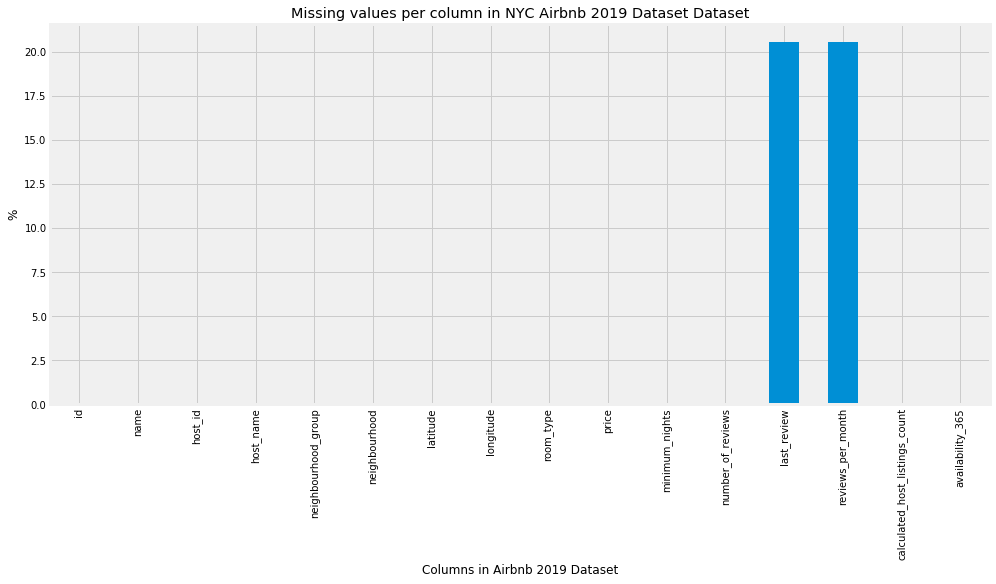

In [6]:
#find percentage of missing values for each column
#find percentage of missing values for each column
ab_nyc_missing= df.isnull().mean()*100
#filter out only columns, which have missing values
#listings_columns_with_nan = listings_missing[listings_missing > 0]

#plot the results
ab_nyc_missing.plot.bar(title='Missing values per column in NYC Airbnb 2019 Dataset Dataset',figsize=(15, 7))
plt.xlabel('Columns in Airbnb 2019 Dataset')
plt.ylabel('%')

#### As the bar chart shown above, the values of last_review and reviews_per_months were missing up to 22 %.
#### Looking into the nature of our dataset, we can state further things: columns 'id','name' and 'host_name'' are irrelevant and insignificant to our data analysis. Another column 'last_review' is date, and if there were no reviews for the listings that date simply will not exist. In this case, this is irrelevant so appending those values is not needed. For column 'last_review' and 'review_per_month' need very simple handling.

#### 3.3 Data Cleaning: Dropped irrelevant  columns and Replaced Nan values in missing values 

In [7]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
df.drop(['id','name','host_name','last_review'], axis=1, inplace=True)
#examing the changes
df.head(5)

host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [8]:
#replacing all NaN values in 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
df.reviews_per_month.isnull().sum()

0

In [9]:
# Checking for missing values again
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### 3.4 Explore others columns

In [10]:
#examining the unique values of neighbourhood_group as this column will appear very handy for later analysis
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [11]:
#examining the unique values of room_type as this column will appear very handy for later analysis
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

### 4. Basic Stats from the data

In [12]:
df['price'].describe().T

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [13]:
print(f"Average of price per night : ${df.price.mean():.2f}")
print(f"Maximum price per night : ${df.price.max()}")
print(f"Minimum price per night : ${df.price.min()}")

Average of price per night : $152.72
Maximum price per night : $10000
Minimum price per night : $0


### 5.  Correlation Matrix 

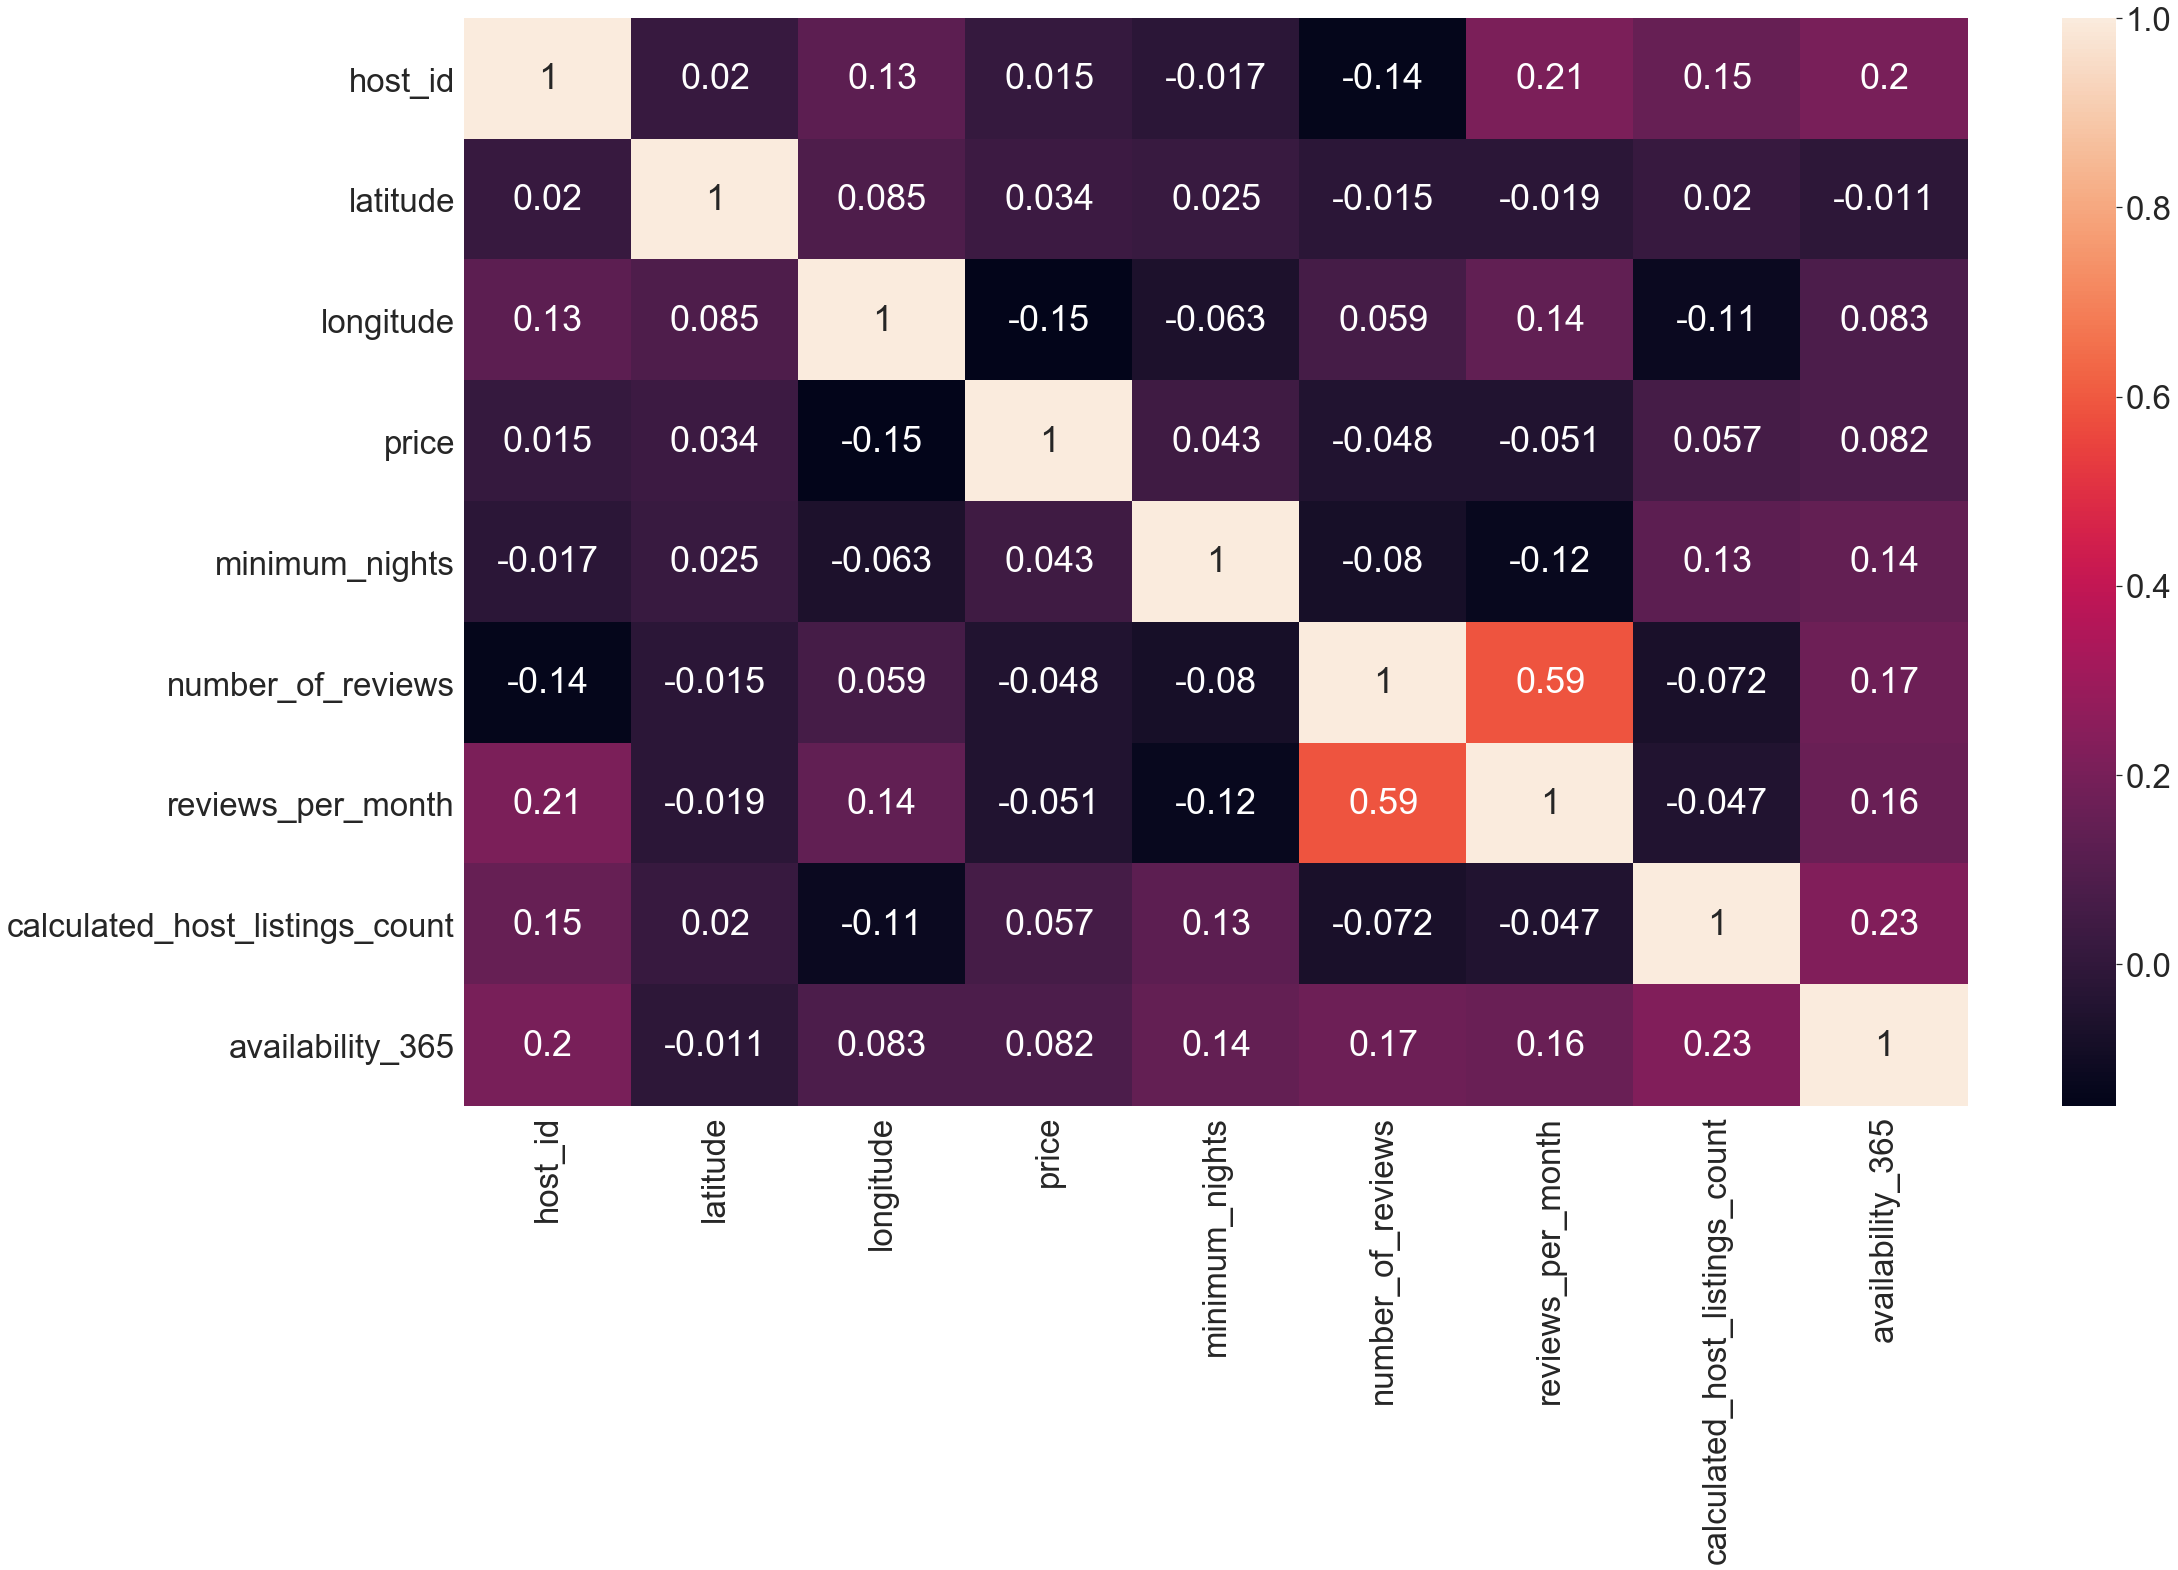

In [14]:
# correlation matrix
sns.set(font_scale=3)
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True)

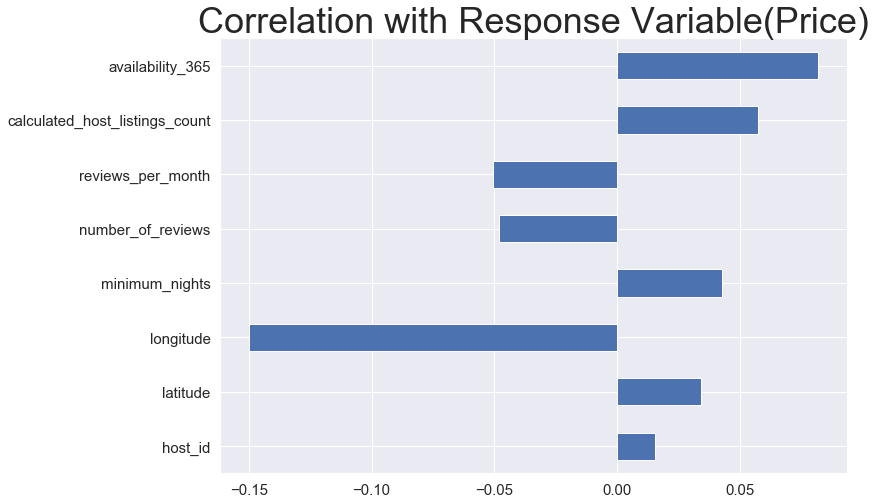

In [15]:
df.drop('price', axis=1).corrwith(df.price).plot.barh(figsize=(10, 8), 
                                                        title='Correlation with Response Variable(Price)',
                                                        fontsize=15, grid=True)

### 6. High Level Analysis with Data Visualization

#### 6.1 Where are airbnb's host locations ?

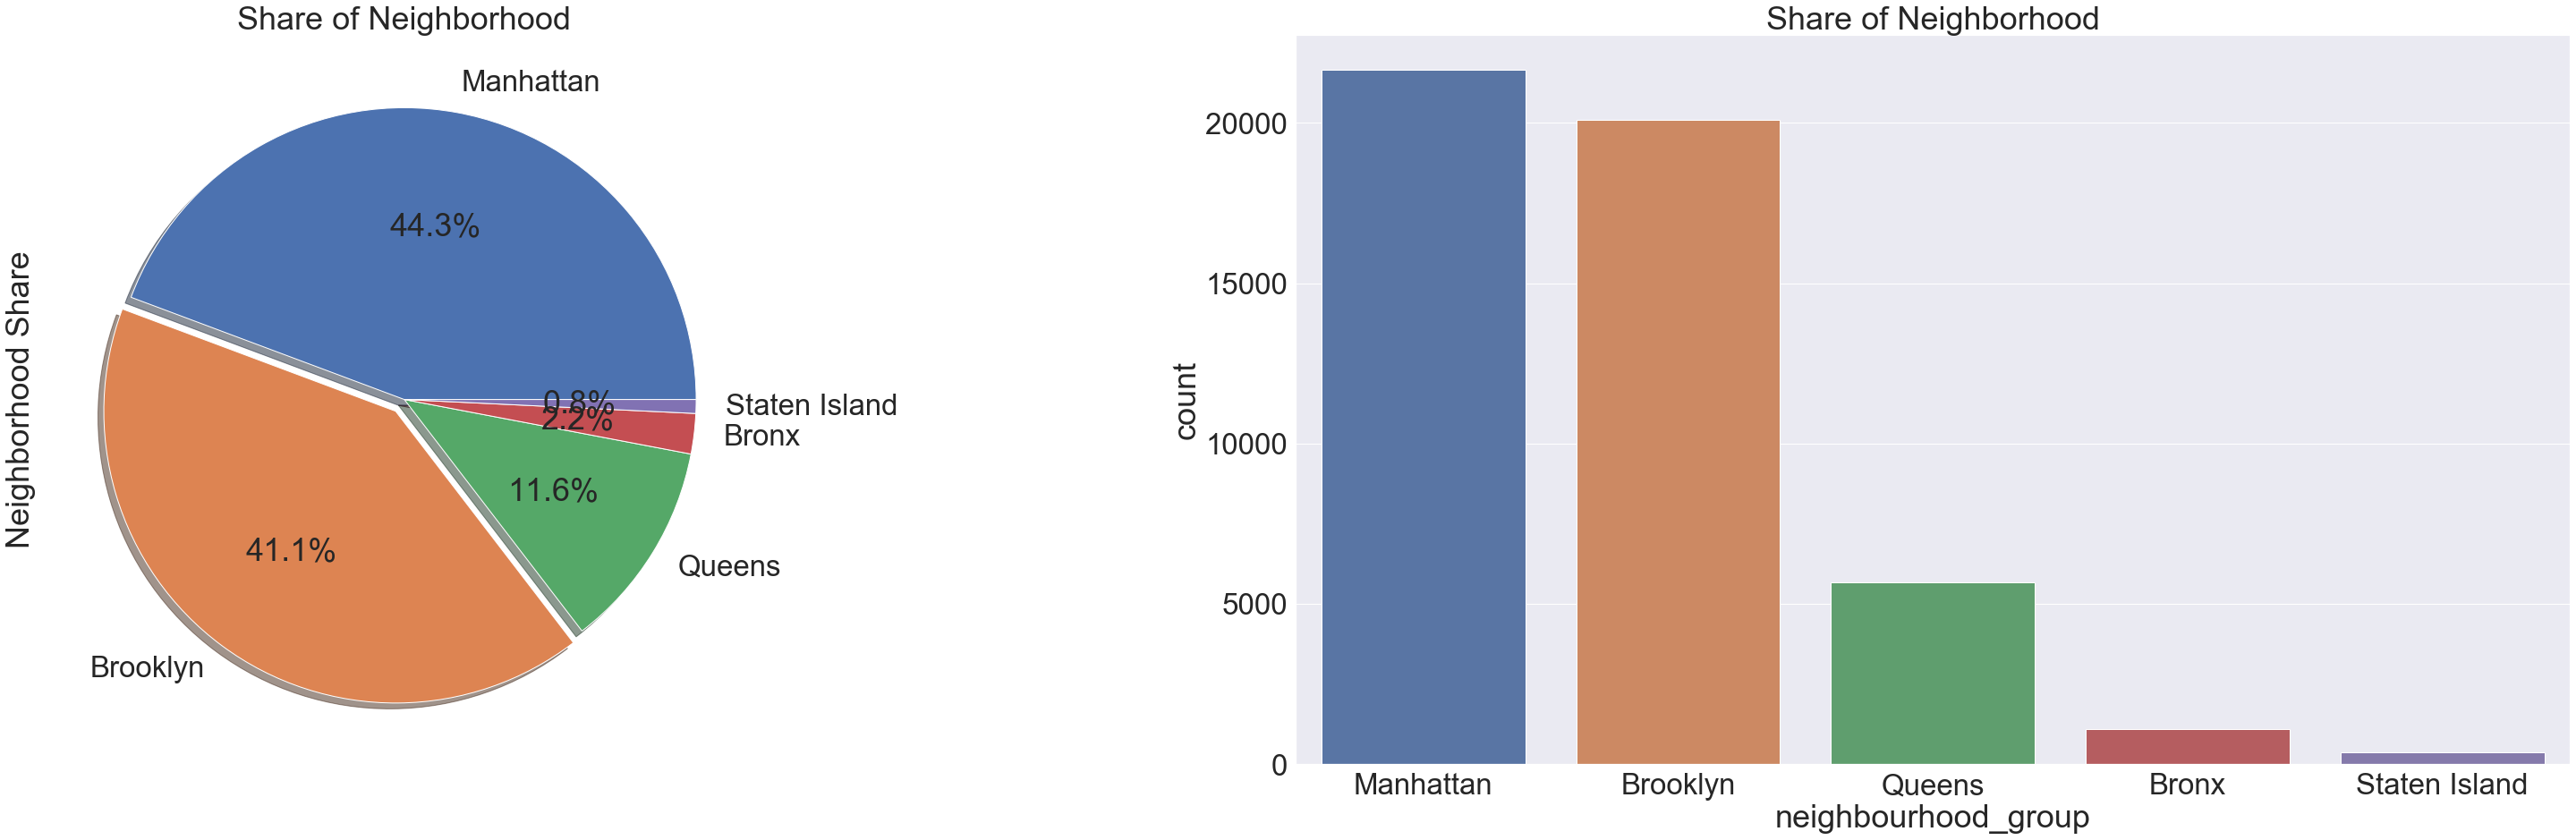

In [16]:
f,ax=plt.subplots(1,2,figsize=(50,15))
df['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.05,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('neighbourhood_group',data=df,ax=ax[1],order=df['neighbourhood_group'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
plt.show()

#### Manhatten and Brooklyn both have more than 40% of airbnb listings which means they took majority of nyc listings.

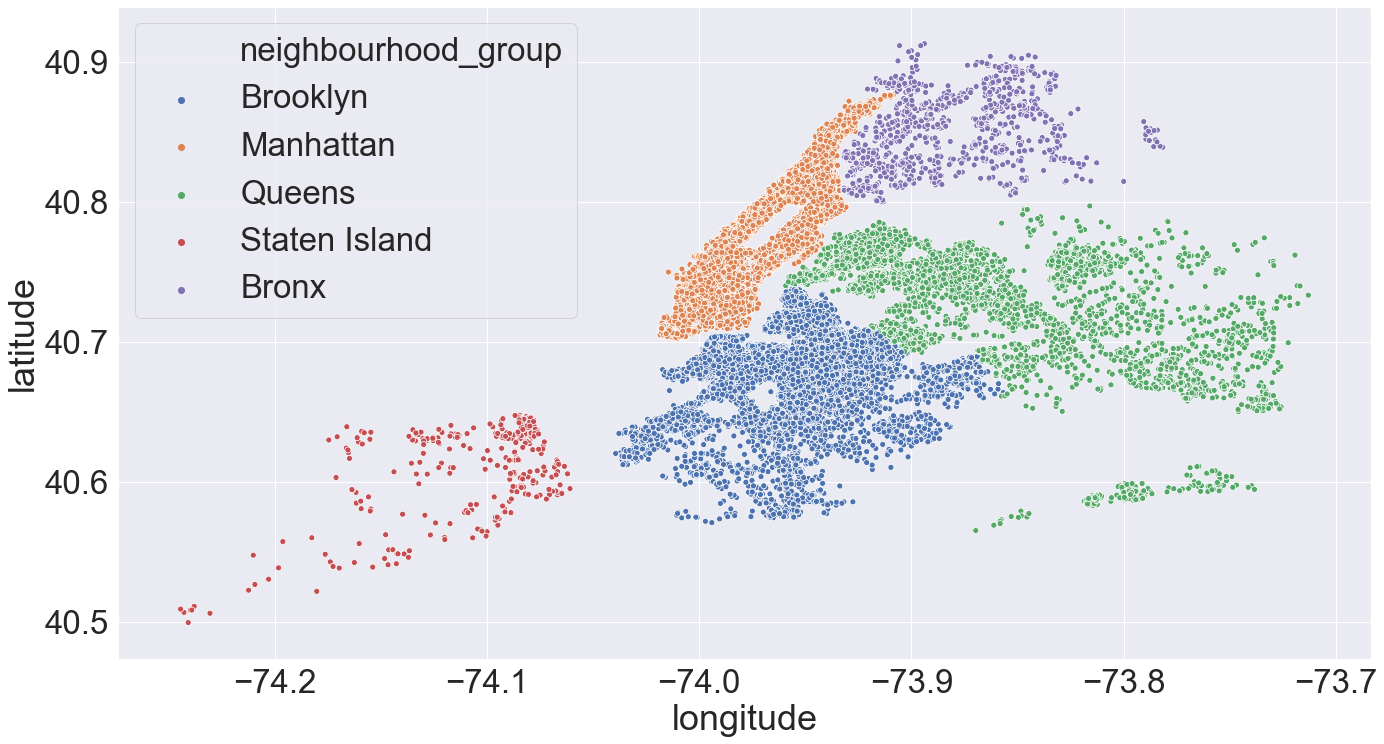

In [17]:
plt.figure(figsize=(20,12))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

#### Airbnb hosts Distribution in a Heat Map

In [18]:
import folium
from folium.plugins import HeatMap
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

#### The highest Density areas are marked in red and lowest density areas are marked in blue color. That corresponded the pie chart above Manhatten and Brooklyn took majority of nyc listings.

#### Lets Check How the price varies with different neighborhoods

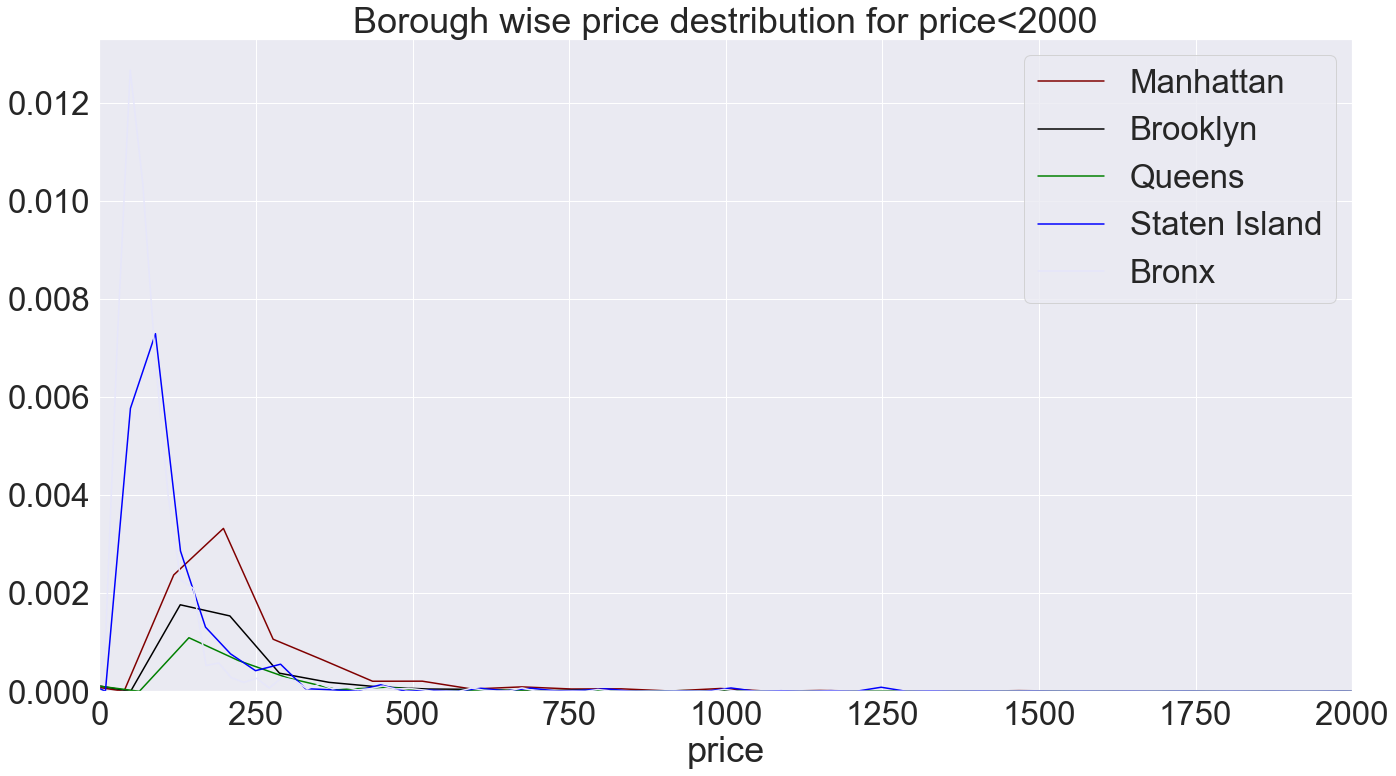

In [19]:
plt.figure(figsize=(20,12))
sns.distplot(df[df.neighbourhood_group=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(df[df.neighbourhood_group=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(df[df.neighbourhood_group=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(df[df.neighbourhood_group=='Staten Island'].price,color='blue',hist=False,label='Staten Island')
sns.distplot(df[df.neighbourhood_group=='Bronx'].price,color='lavender',hist=False,label='Bronx')
plt.title('Borough wise price destribution for price<2000')
plt.xlim(0,2000)
plt.show()

Text(0, 0.5, 'price')

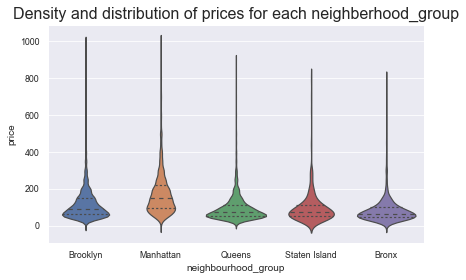

In [20]:
#creating a sub-dataframe with no extreme values / less than 1000
sub_df=df[df['price'] < 1000]
#using violinplot to showcase density and distribtuion of prices 
#viz=sns.violinplot(data=sub_df, x='neighbourhood_group', y='price')

sns.set_context("paper", rc={'figure.figsize':(18,12),"font.size":12,"axes.titlesize":12,"axes.labelsize":7})  
ax = sns.violinplot(x="neighbourhood_group", y="price", inner='quartile', data=sub_df, figsize=(10,8))
ax.set_title('Density and distribution of prices for each neighberhood_group', fontsize=16)
ax.set_xlabel("neighbourhood_group",fontsize=10)
ax.set_ylabel("price",fontsize=10)

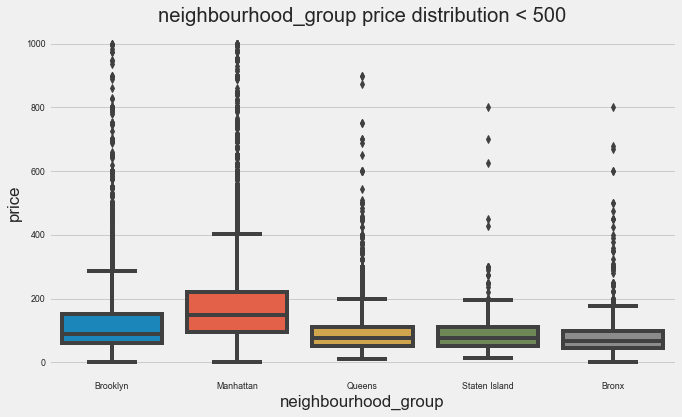

In [21]:
plt.style.use('fivethirtyeight')
ng = df[df.price <1000]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group' ,data = ng)
plt.title("neighbourhood_group price distribution < 500")
plt.show()

#### With a violin plot and box plot, we can observe a couple of things about distribution of prices of Airbnb in NYC neighbourhood. First we can state that Manhattan the highest range of prices for the listings with around 150 dollars as average observation.Followed by Brooklyn with around 100 dollars as average per night. Second, Queens and Staten Island appear to have similar distributions. Last, Bronx is the cheapest neighborhood compared with others. 

#### 6.2 Getting NYC Airbnb room details 

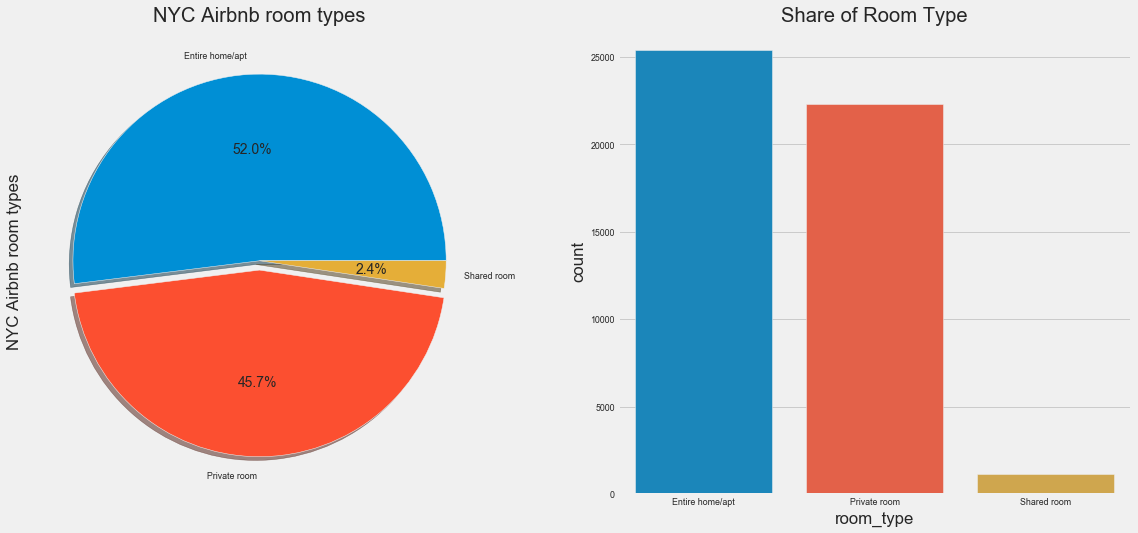

In [22]:
plt.style.use('fivethirtyeight')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['room_type'].value_counts().plot.pie(explode=[0,0.05,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('NYC Airbnb room types')
ax[0].set_ylabel('NYC Airbnb room types')
sns.countplot('room_type',data=df,ax=ax[1],order=df['room_type'].value_counts().index)
ax[1].set_title('Share of Room Type')
plt.show()

#### As we can see that Entire home apartment has highest type followed by private room. Both of "Entire home/apt" and "private room" are in the majority of NYC airbnb listings. least prefered is shared room

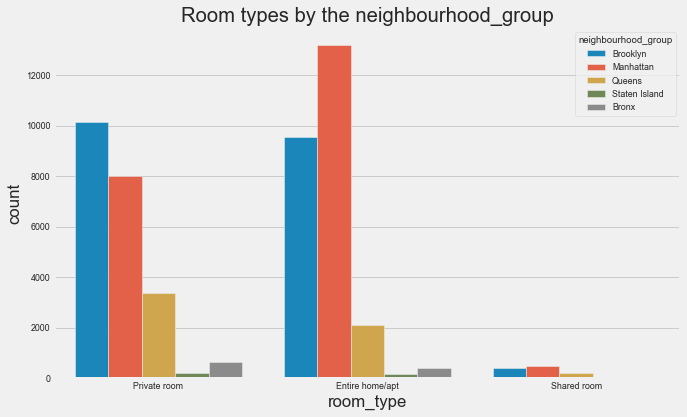

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = df)
plt.title("Room types by the neighbourhood_group")
plt.show()

#### We got the Neighborhood wise share of rooms. Brooklyn has the largest number of private room as room type, and Manhattan has the largest number of entire home/apt as room type. 

Text(0, 0.5, '')

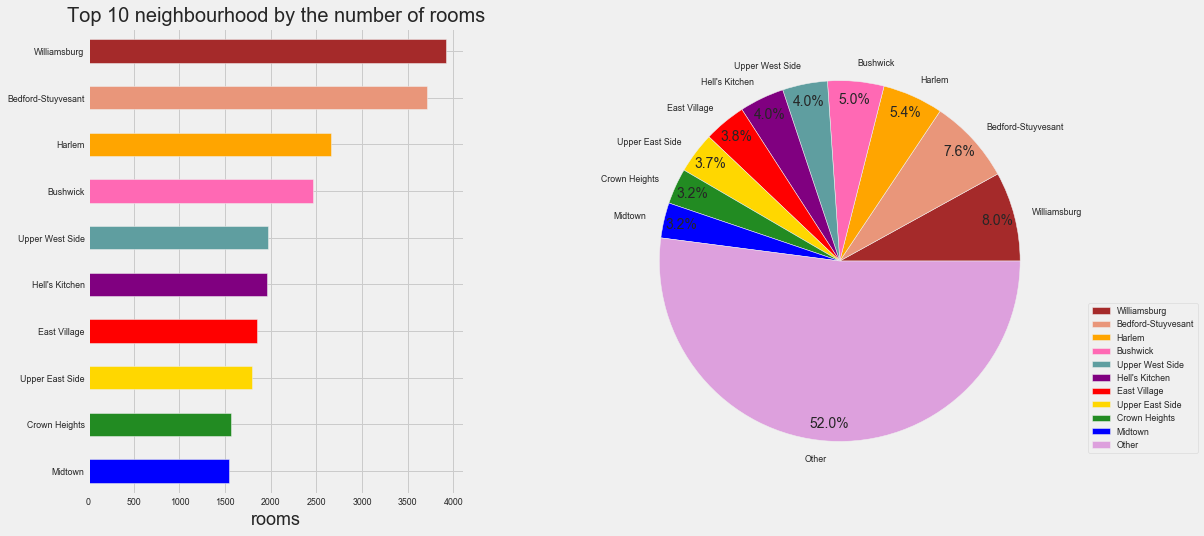

In [24]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.neighbourhood.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 neighbourhood by the number of rooms",size=20)
ax[0].set_xlabel('rooms',size=18)

count=df['neighbourhood'].value_counts()
groups=list(df['neighbourhood'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')

#### Williamsburg,Bedford-Stuyvesant and Hariem have highest number of rooms.

#### 6.4 Getting NYC Airbnb room's prive with number of reviews 

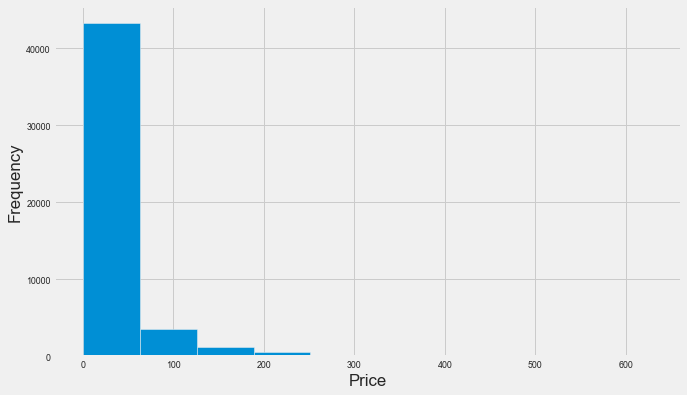

In [25]:
plt.figure(figsize=(10,6))
df['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.ioff()
plt.show()

#### We can see that low cost rooms or in range 0-50 dollars have more reviews.

#### 6.5 Displaying rooms with maximum Reviews

In [26]:
df2=df.sort_values(by=['number_of_reviews'],ascending=False).head(1000)
df2.head()

host_id neighbourhood_group neighbourhood  latitude  longitude  \
11759  47621202              Queens       Jamaica  40.66730  -73.76831   
2031    4734398           Manhattan        Harlem  40.82085  -73.94025   
2030    4734398           Manhattan        Harlem  40.82124  -73.93838   
2015    4734398           Manhattan        Harlem  40.82264  -73.94041   
13495  47621202              Queens       Jamaica  40.66939  -73.76975   

          room_type  price  minimum_nights  number_of_reviews  \
11759  Private room     47               1                629   
2031   Private room     49               1                607   
2030   Private room     49               1                597   
2015   Private room     49               1                594   
13495  Private room     47               1                576   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173

In [27]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
print('Rooms with the most number of reviews. Top 1000 listings')
Long=-73.80
Lat=40.80
mapdf1=folium.Map([Lat,Long],zoom_start=10,)

mapdf1_rooms_map=plugins.MarkerCluster().add_to(mapdf1)

for lat,lon,label in zip(df2.latitude,df2.longitude,df2.host_id):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapdf1_rooms_map)
mapdf1.add_child(mapdf1_rooms_map)

mapdf1

Rooms with the most number of reviews. Top 1000 listings


#### 6.6 Getting NYC Airbnb room Availability Details 

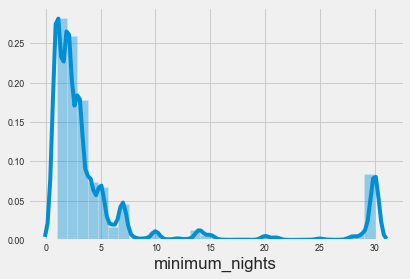

In [28]:
sns.distplot(df[(df['minimum_nights'] <= 30) & (df['minimum_nights'] > 0)]['minimum_nights'], bins=31)

#### As we can see clearly, most books minimum nights are for 1, 2, 3 days. There are some listings have minium nights up to 30 nights.

### 7. Price prediction with Machine Learning

In [29]:
# preparing data 
# we dropeed the irrelevant column at the very begining 
# At here, we are replacing missing value reviews_per_month
df['reviews_per_month'] = df['reviews_per_month'].replace(np.nan, 0)

#### 7.1 Use Label Encoder convert the categorical i.e text features to its numeric representation

In [30]:
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(df['neighbourhood_group'])
df['neighbourhood_group']=le.transform(df['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(df['neighbourhood'])
df['neighbourhood']=le.transform(df['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(df['room_type'])
df['room_type']=le.transform(df['room_type'])

df.sort_values(by='price',ascending=True,inplace=True)

df.head()

host_id  neighbourhood_group  neighbourhood  latitude  longitude  \
25796   86327101                    1             13  40.68258  -73.91284   
25634   15787004                    1             28  40.69467  -73.92433   
25433  131697576                    0             62  40.83296  -73.88668   
25753    1641537                    1             91  40.72462  -73.94072   
23161    8993084                    1             13  40.69023  -73.95428   

       room_type  price  minimum_nights  number_of_reviews  reviews_per_month  \
25796          1      0               1                 95               4.35   
25634          1      0               2                 16               0.71   
25433          1      0               2                 55               2.56   
25753          1      0               2                 12               0.53   
23161          1      0               4                  1               0.05   

       calculated_host_listings_count  availability_365  
25796                               6               222  
25634                               5                 0  
25433                               4               127  
25753                               2                 0  
23161                               4                28

### 7.2 Linear Regression Model
    Standard Scale: 
        1) What does it do?
          It will resize your features. It assumes that the data for each feature is normally 
          distributed and will scale the feature so that the distribution is now centered
          around 0 and has a standard deviation of 1.
        2) When can it be used?
          If the range of values of my features varies widely.
        3)Expected 2D array
    Reference: https://medium.com/@yhpf/standardscaler-fd4bef76411d

In [31]:
'''Train LRM'''
lm = LinearRegression()


X = df[['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df['price']

# Reshaped from 1D array to 2D array
y = y.values.reshape(-1,1)

# Standard Scale of the price
from sklearn.preprocessing import StandardScaler
ss = preprocessing.StandardScaler()
y = ss.fit_transform(y)

#Spliting the dataset into Training set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Metrics to measure machine learning model performance
   1. Root mean squared error (RMSE)
       - The RMSE measures the quadratic mean of the differences between the predictions made by a model and the actual values (residuals).
       - The measure is always positive or 0, being this last value the best one possible.
       - How to read: Values closer to 0 are better than higher values.
   2. R2 Score
       - The R2 is the proportion of the variance in the dependent variable that is predictable from the independent variable It explains how well a model performs when replicating the observed outcomes
       - R-squared is measured on values between 0 and 1
       - How to read: Values closer to 1 are better than lower values.
   3. Mean Absloute Error(MAE)
       - The MAE is a simple way to measure error magnitude.
       - Measure goes from 0 to infinite, being 0 the best value you can get.
       - How to read: Values closer to 0 are better than higher values.
       
 Reference: https://medium.com/@limavallantin/metrics-to-measure-machine-learning-model-performance-e8c963665476

In [32]:
predicts = lm.predict(X_test)

print("""
        Root Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) ,
        mean_absolute_error(y_test,predicts)
        ))


        Root Mean Squared Error: 0.7605534040594069
        R2 Score: 0.0975806227931375
        Mean Absolute Error: 0.3113186145371059
     


### 7.3 Gradient Boosted Regressor Model
Definition: Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

Reference: Wikipedia

In [33]:
'''Gradient Boosted Regressor'''
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
'''Get Predictions & Metrics'''
predicts2 = GBoost.predict(X_test)

print("""
        Root Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts2)),
        r2_score(y_test,predicts2),
        mean_absolute_error(y_test,predicts2)
        ))


        Root Mean Squared Error: 0.7379884177472685
        R2 Score: 0.15033432281949288
        Mean Absolute Error: 0.27248079504956313
     


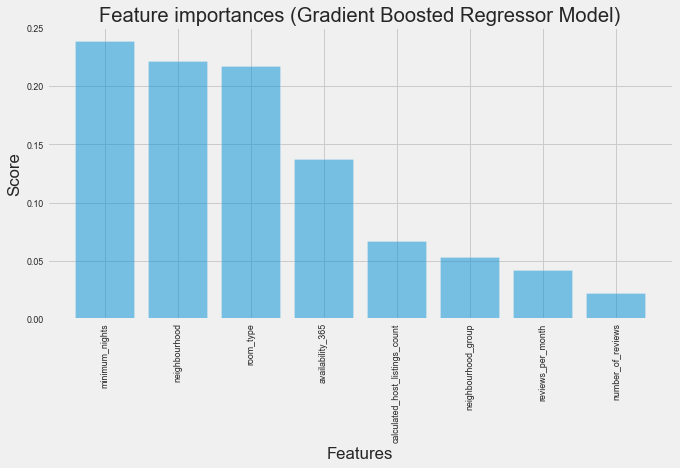

In [35]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, GBoost.feature_importances_), key=lambda x: x[1] * -1)
GBoost_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances for top 15 features
features = GBoost_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = GBoost_feature_importances['score'][:15]
 
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (Gradient Boosted Regressor Model)')

plt.show()